# 고양이 수염 스티커 만들기

## 사진 준비하기

In [1]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
print("🌫🛸")

🌫🛸


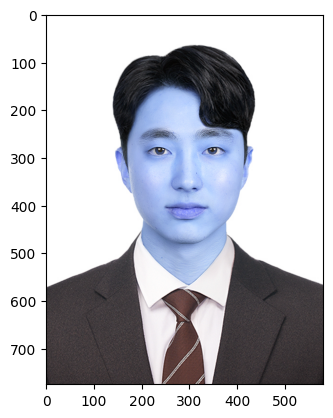

In [2]:
my_image_path = '/content/drive/MyDrive/아이펠/camera_sticker/image/IMG_6208.JPG' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

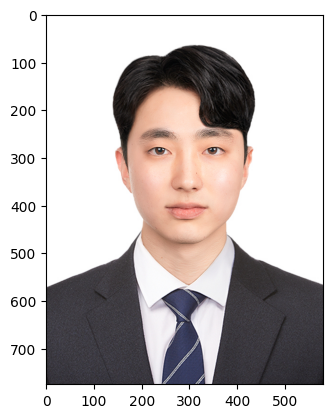

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

## 얼굴 검출

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(171, 201) (438, 468)]]


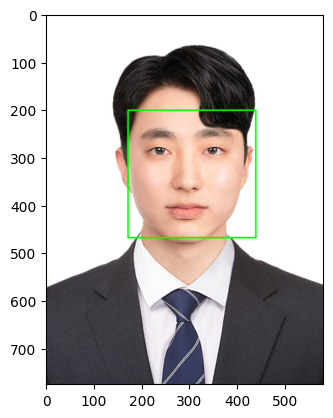

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 얼굴 랜드마크

In [7]:
# 필요한 디렉토리 생성
!mkdir -p /content/drive/MyDrive/아이펠/camera_sticker/models

# 파일 다운로드 및 이동
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 -O /content/drive/MyDrive/아이펠/camera_sticker/models/shape_predictor_68_face_landmarks.dat.bz2

# 다운로드된 파일의 압축 해제
!bzip2 -d /content/drive/MyDrive/아이펠/camera_sticker/models/shape_predictor_68_face_landmarks.dat.bz2

# 결과 확인
!ls /content/drive/MyDrive/아이펠/camera_sticker/models

--2025-01-24 07:26:29--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-01-24 07:26:29--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘/content/drive/MyDrive/아이펠/camera_sticker/models/shape_predictor_68_face_landmarks.dat.bz2’

/content/drive/MyDr 100%[===================>]  61.07M  17.7MB/s    in 4.4s    

2025-01-24 07:26:34 (14.0 MB/s) - ‘/content/drive/MyDrive/아이펠/camera_sticker/models/shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file /content/drive/MyDrive/아이펠/camera_sticker/models/shape_predicto

In [8]:
model_path = '/content/drive/MyDrive/아이펠/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [9]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


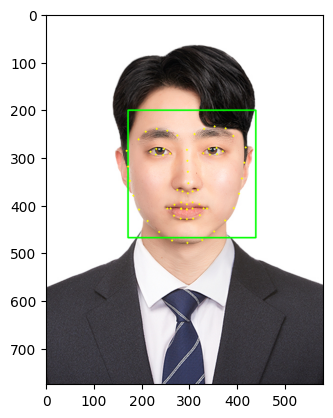

In [10]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

## 스티커 적용하기

In [11]:
sticker_path = '/content/drive/MyDrive/아이펠/camera_sticker/image/cat-whiskers.png'  # 고양이 수염 이미지 경로

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):  # 얼굴 영역과 랜드마크 반복
    # 스티커 이미지 원본 새로 로드
    img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # 4채널 이미지 읽기

    if img_sticker is None:
        print("스티커 이미지를 불러올 수 없습니다. 경로를 확인하세요.")
        continue

    print(landmark[30])  # 코의 index는 30
    nose_x = landmark[30][0]  # 코의 x좌표
    nose_y = landmark[30][1]  # 코의 y좌표
    mouth_x = (landmark[48][0] + landmark[54][0]) // 2  # 입 양 끝의 x값 평균
    mouth_y = (landmark[48][1] + landmark[54][1]) // 2  # 입 양 끝의 y값 평균

    # 스티커 크기 설정 (코와 입의 거리로 조정)
    w = h = dlib_rect.width() // 2  # 얼굴 크기의 절반으로 크기 조정
    img_sticker = cv2.resize(img_sticker, (w, h))  # 스티커 이미지 크기 조정
    print(img_sticker.shape)  # 크기 확인

    # 스티커 위치 계산 (입과 코 중간 지점에 배치)
    refined_x = nose_x - w // 2
    refined_y = (nose_y + mouth_y) // 2 - h // 2  # 코와 입 중간을 기준으로 배치

    # 음수 좌표 보정
    if refined_x < 0:
        img_sticker = img_sticker[:, -refined_x:]  # x축 음수일 경우 스티커를 crop
        refined_x = 0
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]  # y축 음수일 경우 스티커를 crop
        refined_y = 0

    print(f'(x,y): ({refined_x},{refined_y})')

    # 원본 이미지에 스티커를 추가하기 위해 영역을 crop
    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    # 스티커의 알파 채널(투명도)을 활용하여 합성
    alpha_sticker = img_sticker[:, :, 3] / 255.0  # 스티커의 알파 채널
    alpha_image = 1.0 - alpha_sticker  # 원본 이미지의 투명도

    for c in range(3):  # BGR 채널
        sticker_area[:, :, c] = (alpha_sticker * img_sticker[:, :, c] +
                                 alpha_image * sticker_area[:, :, c])

    # 합성된 이미지를 원본 이미지에 반영
    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = sticker_area

print("슝~")

(297, 354)
(134, 134, 4)
(x,y): (230,313)
슝~


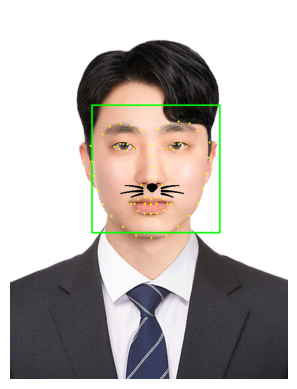

In [12]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

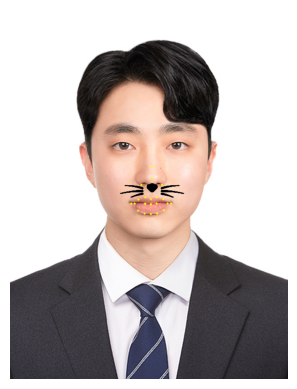

In [13]:
# 원본 이미지 복사 (랜드마크 표시 전에)
img_clean = img_bgr.copy()  # 랜드마크 표시 이전의 깨끗한 원본 이미지 저장

# 스티커를 합성할 이미지로 초기화
img_bgr = img_clean.copy()

# 알파 채널 분리
alpha_sticker = img_sticker[:, :, 3] / 255.0  # 스티커의 알파 채널 (0~1로 정규화)
alpha_image = 1.0 - alpha_sticker  # 원본 이미지의 알파 값

# BGR 채널만 추출 (스티커 이미지에서)
img_sticker_bgr = img_sticker[:, :, :3]

# 스티커 영역과 원본 이미지를 알파 채널에 따라 합성
for c in range(3):  # B, G, R 채널 반복
    sticker_area[:, :, c] = (alpha_sticker * img_sticker_bgr[:, :, c] +
                             alpha_image * sticker_area[:, :, c])

# 합성 결과를 원본 이미지에 반영
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = sticker_area

# 결과 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 제거
plt.show()

---

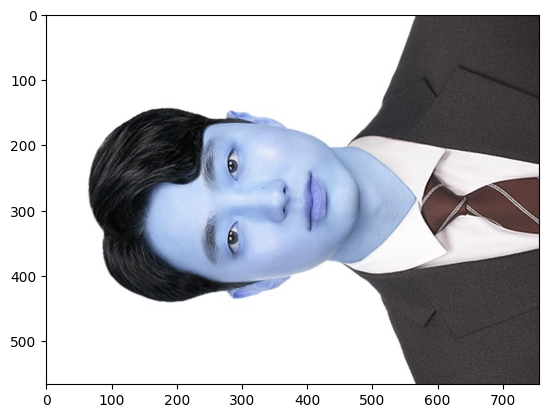

In [14]:
my_image_path = '/content/drive/MyDrive/아이펠/camera_sticker/image/IMG_6208 2.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

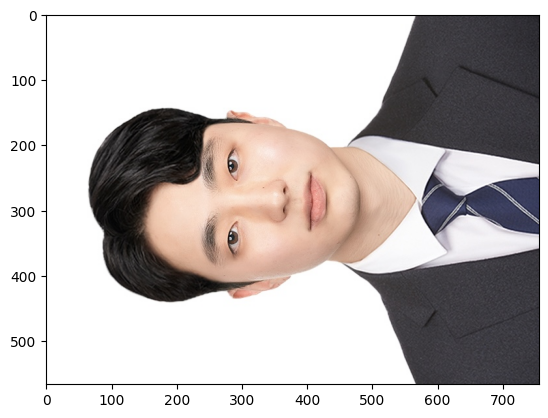

In [15]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

rectangles[[(171, 201) (438, 468)]]


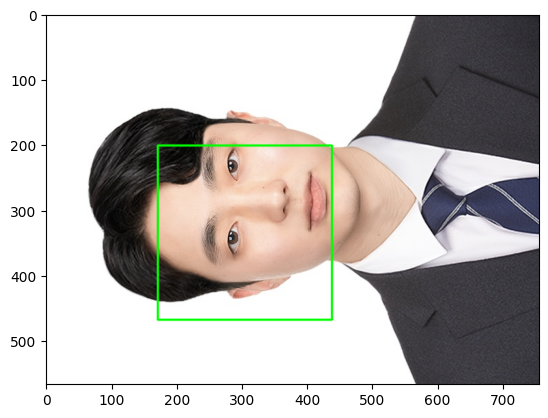

In [16]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [17]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


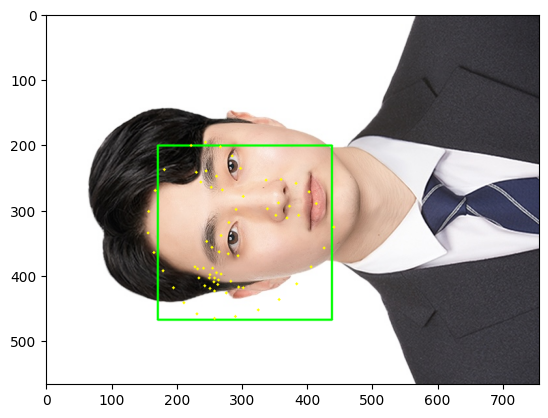

In [18]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [19]:
sticker_path = '/content/drive/MyDrive/아이펠/camera_sticker/image/cat-whiskers.png'  # 고양이 수염 이미지 경로

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):  # 얼굴 영역과 랜드마크 반복
    # 스티커 이미지 원본 새로 로드
    img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # 4채널 이미지 읽기

    if img_sticker is None:
        print("스티커 이미지를 불러올 수 없습니다. 경로를 확인하세요.")
        continue

    print(landmark[30])  # 코의 index는 30
    nose_x = landmark[30][0]  # 코의 x좌표
    nose_y = landmark[30][1]  # 코의 y좌표
    mouth_x = (landmark[48][0] + landmark[54][0]) // 2  # 입 양 끝의 x값 평균
    mouth_y = (landmark[48][1] + landmark[54][1]) // 2  # 입 양 끝의 y값 평균

    # 스티커 크기 설정 (코와 입의 거리로 조정)
    w = h = dlib_rect.width() // 2  # 얼굴 크기의 절반으로 크기 조정
    img_sticker = cv2.resize(img_sticker, (w, h))  # 스티커 이미지 크기 조정
    print(img_sticker.shape)  # 크기 확인

    # 스티커 위치 계산 (입과 코 중간 지점에 배치)
    refined_x = nose_x - w // 2
    refined_y = (nose_y + mouth_y) // 2 - h // 2  # 코와 입 중간을 기준으로 배치

    # 음수 좌표 보정
    if refined_x < 0:
        img_sticker = img_sticker[:, -refined_x:]  # x축 음수일 경우 스티커를 crop
        refined_x = 0
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]  # y축 음수일 경우 스티커를 crop
        refined_y = 0

    print(f'(x,y): ({refined_x},{refined_y})')

    # 원본 이미지에 스티커를 추가하기 위해 영역을 crop
    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    # 스티커의 알파 채널(투명도)을 활용하여 합성
    alpha_sticker = img_sticker[:, :, 3] / 255.0  # 스티커의 알파 채널
    alpha_image = 1.0 - alpha_sticker  # 원본 이미지의 투명도

    for c in range(3):  # BGR 채널
        sticker_area[:, :, c] = (alpha_sticker * img_sticker[:, :, c] +
                                 alpha_image * sticker_area[:, :, c])

    # 합성된 이미지를 원본 이미지에 반영
    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = sticker_area

print("슝~")

(268, 339)
(134, 134, 4)
(x,y): (201,304)
슝~


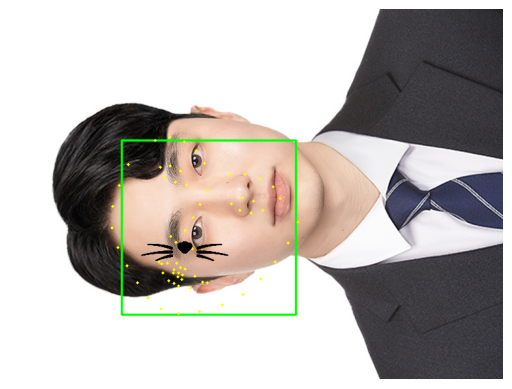

In [20]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

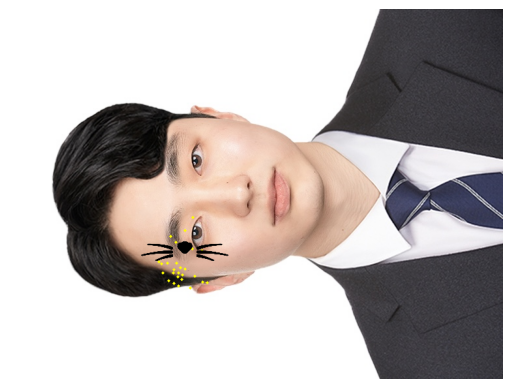

In [21]:
# 원본 이미지 복사 (랜드마크 표시 전에)
img_clean = img_bgr.copy()  # 랜드마크 표시 이전의 깨끗한 원본 이미지 저장

# 스티커를 합성할 이미지로 초기화
img_bgr = img_clean.copy()

# 알파 채널 분리
alpha_sticker = img_sticker[:, :, 3] / 255.0  # 스티커의 알파 채널 (0~1로 정규화)
alpha_image = 1.0 - alpha_sticker  # 원본 이미지의 알파 값

# BGR 채널만 추출 (스티커 이미지에서)
img_sticker_bgr = img_sticker[:, :, :3]

# 스티커 영역과 원본 이미지를 알파 채널에 따라 합성
for c in range(3):  # B, G, R 채널 반복
    sticker_area[:, :, c] = (alpha_sticker * img_sticker_bgr[:, :, c] +
                             alpha_image * sticker_area[:, :, c])

# 합성 결과를 원본 이미지에 반영
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = sticker_area

# 결과 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 제거
plt.show()

## 문제점
- 이미지를 90도 회전하여 적용했을 때 수염 위치가 부적절하게 놓인 모습이 확인됨
- 기존 코드를 그대로 사용하여 나타난 문제라고 판단됨.
- 코드 수정을 통해 제 위치에 맞게 배치해야할 것 같음.